In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-02-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-06-02-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-04-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-02-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-02-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-05-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_0

In [32]:
import librosa
import librosa.display

import pandas as pd

import IPython.display as ipd

import matplotlib.pyplot as plt

## load file

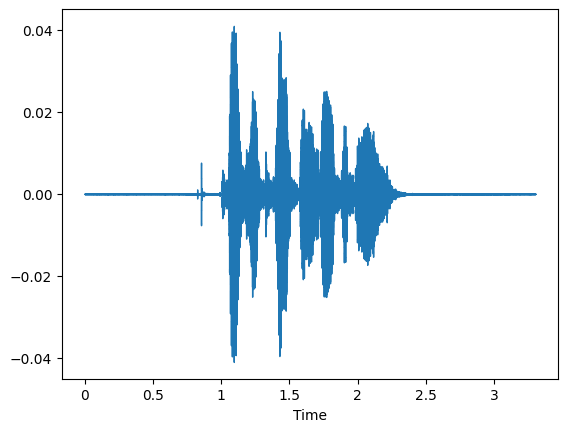

In [10]:
file_name = '/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav'

data, sr = librosa.load(file_name)
librosa.display.waveshow(data, sr=sr)

## trim

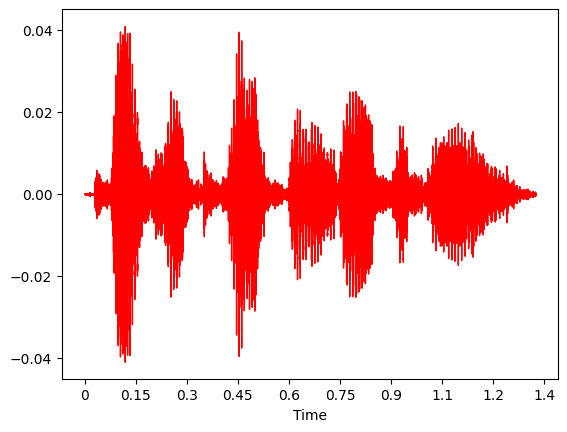

In [17]:
data_train, _ = librosa.effects.trim(data, top_db=30)
librosa.display.waveshow(data_train, sr=sr, color='red')

## Spectogram

In [24]:
# Вычисляем кратковременное преобразование Фурье (STFT), которое переводит сигнал из временной области в частотную.
D = librosa.stft(data)

# Преобразуем амплитуды в децибелы (dB), чтобы лучше визуализировать данные.
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
print(S_db.shape)

(1025, 143)


## Plot transformed audio data

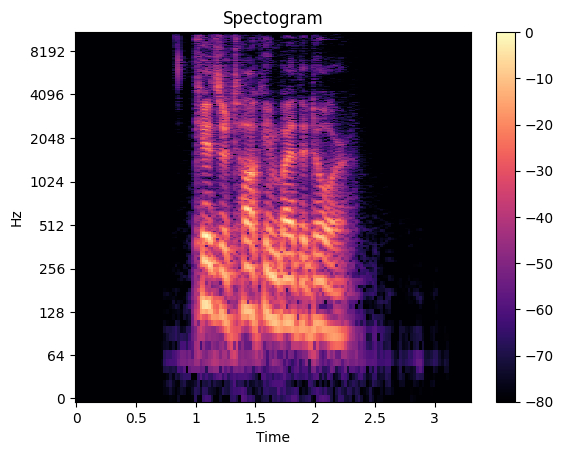

In [35]:
img = librosa.display.specshow(S_db,
                        x_axis='time',
                        y_axis='log')
plt.title('Spectogram')
plt.colorbar(img)

## MEL spectogram

In [46]:
mel_features = librosa.feature.melspectrogram(y=data,
                              sr=sr)

S_db_mel = librosa.amplitude_to_db(mel_features, ref=np.max)
S_db_mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

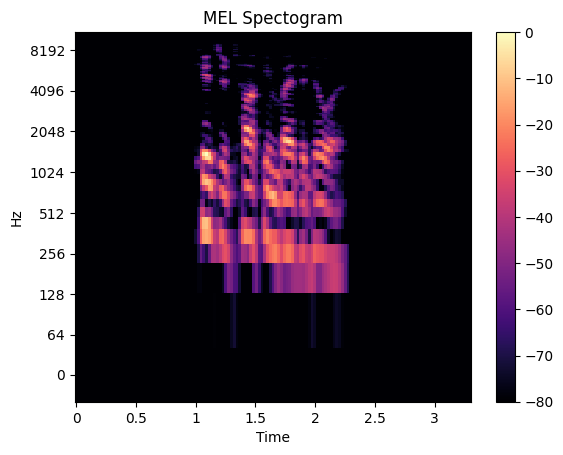

In [47]:
img = librosa.display.specshow(S_db_mel,
                        x_axis='time',
                        y_axis='log')
plt.title('MEL Spectogram')
plt.colorbar(img)